In [112]:
library(tidyverse)
library(dplyr)
library(splines)
library(modelr)
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [5]:
terror_data <- read.csv("C:/Users/roman/OneDrive - Hochschule Luzern/HSLU/5 Semester/DASB/globalterror.csv")

In [7]:
head(terror_data)

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1.97000e+11,1970,7,2,,0,,58,Dominican Republic,2,...,,,,,PGIS,0,0,0,0,
1.97000e+11,1970,0,0,,0,,130,Mexico,1,...,,,,,PGIS,0,1,1,1,
1.97001e+11,1970,1,0,,0,,160,Philippines,5,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,78,Greece,8,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,101,Japan,4,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,1,,0,,217,United States,1,...,"The Cairo Chief of Police, William Petersen, resigned as a result of the attack.","""Police Chief Quits,"" Washington Post, January 2, 1970.","""Cairo Police Chief Quits; Decries Local 'Militants',"" Afro-American, January 10, 1970.","Christopher Hewitt, ""Political Violence and Terrorism in Modern America: A Chronology,"" Praeger Security International, 2005.",Hewitt Project,-9,-9,0,-9,


In [8]:
terror <- terror_data %>% rename(year = iyear, month = imonth, day = iday, country_id = country, country = country_txt, region_id = region, region = region_txt)

In [9]:
colnames(terror)

[1] "eventid"            "year"               "month"             
  [4] "day"                "approxdate"         "extended"          
  [7] "resolution"         "country_id"         "country"           
 [10] "region_id"          "region"             "provstate"         
 [13] "city"               "latitude"           "longitude"         
 [16] "specificity"        "vicinity"           "location"          
 [19] "summary"            "crit1"              "crit2"             
 [22] "crit3"              "doubtterr"          "alternative"       
 [25] "alternative_txt"    "multiple"           "success"           
 [28] "suicide"            "attacktype1"        "attacktype1_txt"   
 [31] "attacktype2"        "attacktype2_txt"    "attacktype3"       
 [34] "attacktype3_txt"    "targtype1"          "targtype1_txt"     
 [37] "targsubtype1"       "targsubtype1_txt"   "corp1"             
 [40] "target1"            "natlty1"            "natlty1_txt"       
 [43] "targtype2"          "targtype2_txt"      "targsubtype2"      
 [46] "targsubtype2_txt"   "corp2"              "target2"           
 [49] "natlty2"            "natlty2_txt"        "targtype3"         
 [52] "targtype3_txt"      "targsubtype3"       "targsubtype3_txt"  
 [55] "corp3"              "target3"            "natlty3"           
 [58] "natlty3_txt"        "gname"              "gsubname"          
 [61] "gname2"             "gsubname2"          "gname3"            
 [64] "gsubname3"          "motive"             "guncertain1"       
 [67] "guncertain2"        "guncertain3"        "individual"        
 [70] "nperps"             "nperpcap"           "claimed"           
 [73] "claimmode"          "claimmode_txt"      "claim2"            
 [76] "claimmode2"         "claimmode2_txt"     "claim3"            
 [79] "claimmode3"         "claimmode3_txt"     "compclaim"         
 [82] "weaptype1"          "weaptype1_txt"      "weapsubtype1"      
 [85] "weapsubtype1_txt"   "weaptype2"          "weaptype2_txt"     
 [88] "weapsubtype2"       "weapsubtype2_txt"   "weaptype3"         
 [91] "weaptype3_txt"      "weapsubtype3"       "weapsubtype3_txt"  
 [94] "weaptype4"          "weaptype4_txt"      "weapsubtype4"      
 [97] "weapsubtype4_txt"   "weapdetail"         "nkill"             
[100] "nkillus"            "nkillter"           "nwound"            
[103] "nwoundus"           "nwoundte"           "property"          
[106] "propextent"         "propextent_txt"     "propvalue"         
[109] "propcomment"        "ishostkid"          "nhostkid"          
[112] "nhostkidus"         "nhours"             "ndays"             
[115] "divert"             "kidhijcountry"      "ransom"            
[118] "ransomamt"          "ransomamtus"        "ransompaid"        
[121] "ransompaidus"       "ransomnote"         "hostkidoutcome"    
[124] "hostkidoutcome_txt" "nreleased"          "addnotes"          
[127] "scite1"             "scite2"             "scite3"            
[130] "dbsource"           "INT_LOG"            "INT_IDEO"          
[133] "INT_MISC"           "INT_ANY"            "related"

In [10]:
terror %>% filter(year==1993)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

eventid,year,month,day,approxdate,extended,resolution,country_id,country,region_id,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [11]:
str(terror)

'data.frame':	181691 obs. of  135 variables:
 $ eventid           : num  1.97e+11 1.97e+11 1.97e+11 1.97e+11 1.97e+11 ...
 $ year              : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ month             : int  7 0 1 1 1 1 1 1 1 1 ...
 $ day               : int  2 0 0 0 0 1 2 2 2 3 ...
 $ approxdate        : Factor w/ 2245 levels "","01/04/2000",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ extended          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ resolution        : Factor w/ 1860 levels "","1/1/1978",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ country_id        : int  58 130 160 78 101 217 218 217 217 217 ...
 $ country           : Factor w/ 205 levels "Afghanistan",..: 48 117 141 69 91 190 191 190 190 190 ...
 $ region_id         : int  2 1 5 8 4 1 3 1 1 1 ...
 $ region            : Factor w/ 12 levels "Australasia & Oceania",..: 2 7 10 12 4 7 8 7 7 7 ...
 $ provstate         : Factor w/ 2856 levels "","(Region) of Republican Subordination (Province)",..: 1 784 2505 188 810 1016 1648 441 2766 27

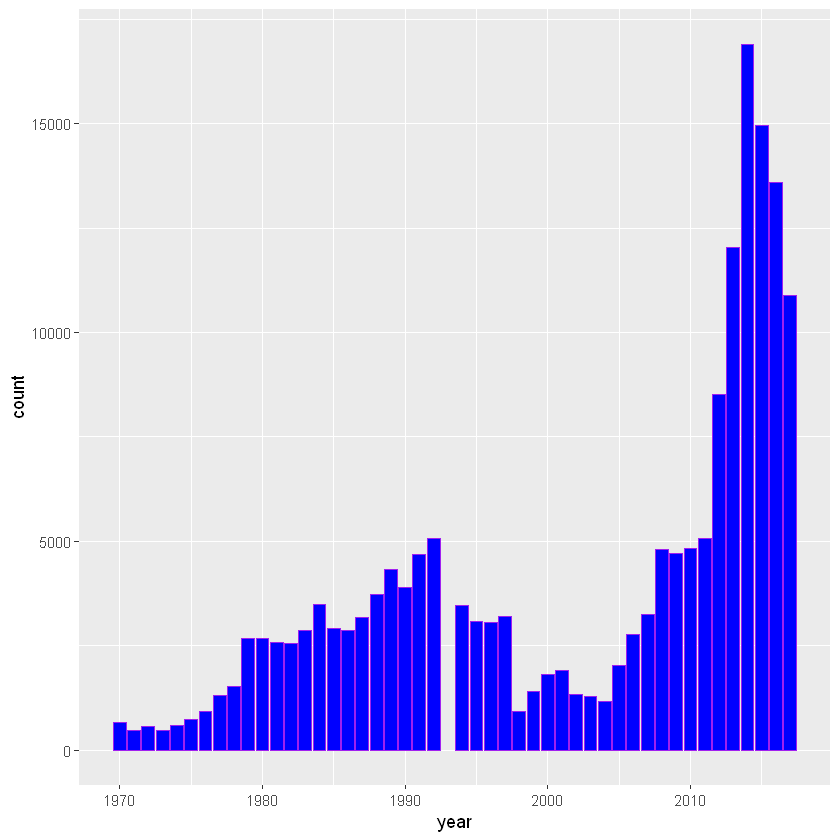

In [12]:
#Attack per year
terror %>% group_by(year) %>% ggplot(aes(year)) + geom_bar(color="purple", fill="blue")


In [18]:
#Attack per region
ggplot(terror, aes(region)) + geom_bar(fill=attacktype1_txt) + coord_flip()

ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomBar, : object 'attacktype1_txt' not found


In [33]:
terror_isil <- terror %>% filter(gname=='Islamic State of Iraq and the Levant (ISIL)')

In [34]:
head(terror_isil)

eventid,year,month,day,approxdate,extended,resolution,country_id,country,region_id,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
201303120031,2013,3,12,,1,,200,Syria,10,...,The victims were of British and Italian nationality.,"""Aid Worker Arrives Back in Italy After Year of Captivity in Syria,"" AFP (North European Service), May 27, 2014.","""ISIS Beheads British Aid Worker David Haines,"" New York Magazine, September 13, 2014.","""British hostage 'was tortured during first months of his captivity',"" The Telegraph, September 4, 2014.",START Primary Collection,0,1,1,1,
201304180002,2013,4,18,,0,,95,Iraq,10,...,Casualty numbers for this incident conflict across sources.,"""Suicide attack kills 26 in Iraq,"" New Straits Times, April 19, 2013.","""Suicide bomber kills at least 27 in Baghdad cafe,"" Reuters, April 18, 2013.","""Bombing kills 32 at Baghdad cafe ahead of vote,"" Japan Times, April 19, 2013.",START Primary Collection,0,1,0,1,
201304200018,2013,4,20,,0,,95,Iraq,10,...,,"""Iraqis vote in local elections despite violence,"" CNN, April 20, 2013.","""Poll centre attacks mar Iraq provincial vote,"" Trend News Agency, April 20, 2013.","""Bombings mar start to milestone Iraq election,"" ABC Online, April 20, 2013.",START Primary Collection,0,1,0,1,"201304200018, 201304200019, 201304200020"
201304200019,2013,4,20,,0,,95,Iraq,10,...,,"""Iraqis vote in local elections despite violence,"" CNN, April 20, 2013.","""UPDATE 1-Bombs mar start to first Iraq vote since US exit,"" Reuters UK, April 20, 2013.","""Scattered violence in Iraq's first elections since US pullout,"" World News Network, April 20, 2013.",START Primary Collection,0,1,0,1,"201304200018, 201304200019, 201304200020"
201304200020,2013,4,20,,0,,95,Iraq,10,...,,"""Iraqis vote in local elections despite violence,"" CNN, April 20, 2013.","""UPDATE 1-Bombs mar start to first Iraq vote since US exit,"" Reuters UK, April 20, 2013.","""Scattered violence in Iraq's first elections since US pullout,"" World News Network, April 20, 2013.",START Primary Collection,0,1,0,1,"201304200018, 201304200019, 201304200020"
201305110007,2013,5,11,,0,,209,Turkey,10,...,"Casualty numbers for this incident conflict across sources. Following GTD protocol, the most recent reliable estimates are reported here. Casualty numbers for this attack represent an equal division of a cumulative total of killed and wounded across incidents 201305110007 and 201305110008. Turkish officials also speculated that the Syrian government sponsored the attacks.","""Turkey 'arrests terror suspects',"" BBC, May 30, 2013.","""Death toll in Turkey car bombings rises to 51,"" Agence France Presse -- English, May 14, 2013.","""Turkey twin bombings death toll rises to 48,"" Agence France Presse -- English, May 13, 2013.",START Primary Collection,1,1,1,1,"201305110007, 201305110008"


In [148]:
yearly_attacks <- terror %>%  
  group_by(year) %>% 
  summarise(attacks_per_year = n()) %>% filter(year > 2000)
#terror_isil <- terror %>% filter(gname=='Islamic State of Iraq and the Levant (ISIL)')
terror_isil <- terror %>% filter(gname=='Taliban')
terror_isil_by_year <- terror_isil %>% group_by(year) %>% summarize(attacks_per_year_isil = n()) %>% filter(year >= 2000)

In [149]:
head(yearly_attacks)
head(terror_isil_by_year)

year,attacks_per_year
2001,1906
2002,1333
2003,1278
2004,1166
2005,2017
2006,2758


year,attacks_per_year_isil
2001,4
2002,7
2003,50
2004,55
2005,120
2006,164


In [150]:
model <- merge(x = yearly_attacks, y = terror_isil_by_year, by = "year", all.x = TRUE)
model

year,attacks_per_year,attacks_per_year_isil
2001,1906,4
2002,1333,7
2003,1278,50
2004,1166,55
2005,2017,120
2006,2758,164
2007,3242,208
2008,4805,258
2009,4721,268
2010,4826,308


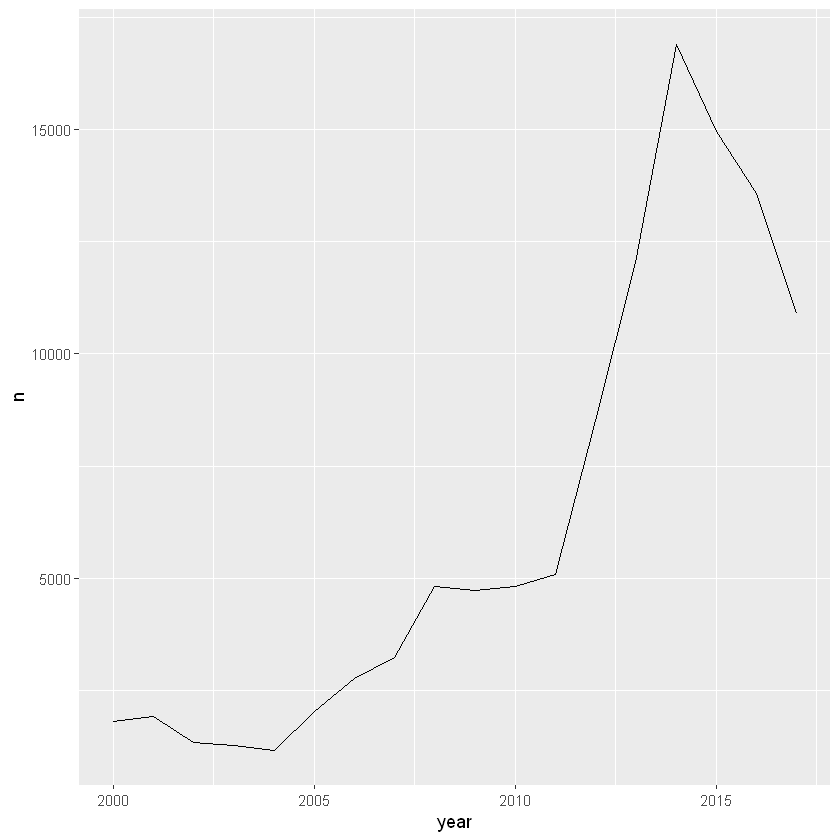

In [151]:
ggplot(yearly, aes(year, n)) + 
  geom_line()

In [152]:
mod <- lm(attacks_per_year~attacks_per_year_isil, data = model)
mod


Call:
lm(formula = attacks_per_year ~ attacks_per_year_isil, data = model)

Coefficients:
          (Intercept)  attacks_per_year_isil  
              1182.75                  12.03  


In [153]:
grid <- model %>% 
  data_grid(attacks_per_year_isil) %>% 
  add_predictions(mod, "n")
grid

attacks_per_year_isil,n
4,1230.885
7,1266.984
50,1784.400
55,1844.565
120,2626.706
164,3156.155
208,3685.605
214,3757.802
258,4287.252
268,4407.581


ERROR while rich displaying an object: Error: Column `x` must be a 1d atomic vector or a list

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

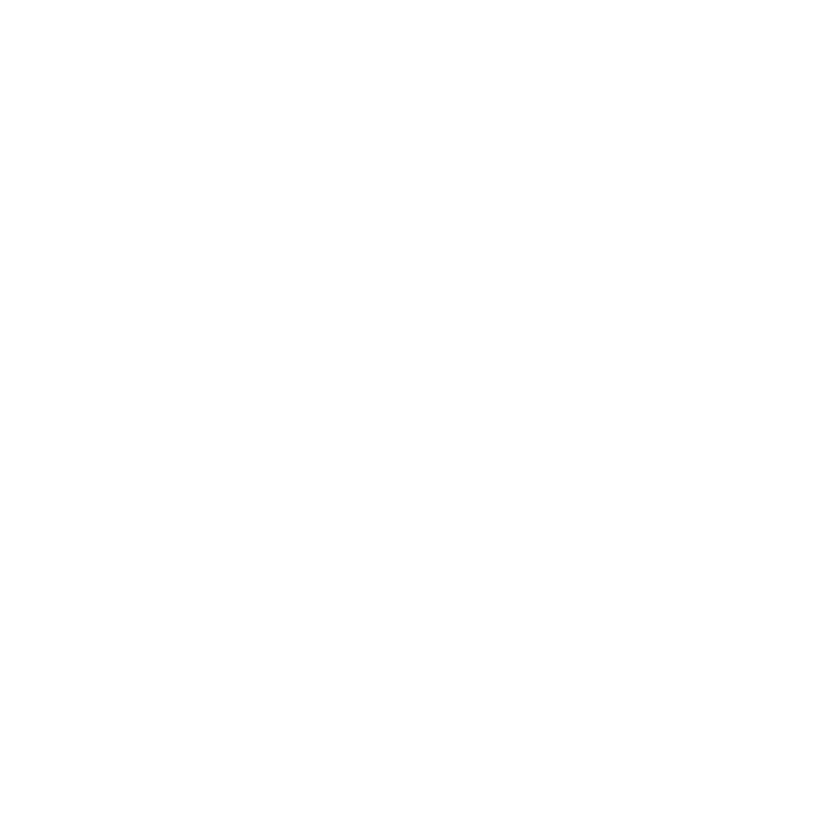

In [154]:
ggplot(model, aes(year, attacks_per_year_isil), na.rm=TRUE) + 
  geom_boxplot() +
  geom_point(data = grid, colour = "red", size = 4)